In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

from sklearn import preprocessing as pp
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import (log_loss, precision_recall_curve, average_precision_score, roc_curve, roc_auc_score, auc, confusion_matrix, classification_report)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

In [2]:
# データの読み込み
data = pd.read_csv('/Users/satun/DataspellProjects/ml/handson-unsupervised-learning/datasets/credit_card_data/credit_card.csv')

In [3]:
# データの最初の5行を出力する．
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# 要約された特徴量情報
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# 列名の一覧を取得
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
data[data['Class'] == 1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [7]:
# 特徴量中のNaNの特定
np.isnan(data).sum() # -> NaNなし

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
data.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [9]:
# 2.3.3 特徴量行列とラベル配列の作成．
dataX = data.copy().drop(['Class'], axis=1)
dataY = data['Class'].copy()

In [10]:
RANDOM_STATE = 2018
# 訓練セットと検証セットに分割
x_train, x_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.33, random_state=RANDOM_STATE, stratify=dataY)

# 訓練セットをk分割交差検証を用いて，今回は5分割する．
# `StratifiedKFold`は，`KFold`と異なり，クラスの分布が偏っていても，元のデータセットと割合が近くなるように分割する，
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
print(f"x_train:\n{x_train.head(3)}")
print(f"x_test:\n{x_test.head(3)}")
print(f"y_train:\n{y_train.head(3)}")
print(f"y_test:\n{y_test.head(3)}")

x_train:
            Time        V1       V2        V3        V4        V5        V6  \
142087   84575.0 -1.981958  1.93346  0.305345 -0.356982 -0.533313 -0.065841   
165168  117245.0  0.141365  1.09839 -0.366686 -0.538319  0.965420 -0.844916   
235908  148591.0  0.195044 -0.64371 -1.432682 -2.112563 -0.124961 -1.171783   

              V7        V8        V9  ...       V20       V21       V22  \
142087 -0.238248  1.113825 -0.242343  ...  0.184048 -0.171607 -0.568387   
165168  1.037264 -0.164037 -0.183759  ...  0.075614 -0.328000 -0.754674   
235908  1.558808 -0.689223 -3.030623  ...  0.104373  0.451796  1.488893   

             V23       V24       V25       V26       V27       V28  Amount  
142087  0.098089 -0.355334 -0.084147  0.111366  0.212020  0.156344   13.99  
165168  0.092707  0.653494 -0.397063  0.106378  0.227831  0.086810    3.87  
235908  0.335824  1.143004 -0.495214  0.093904  0.159268  0.268700  213.40  

[3 rows x 30 columns]
x_test:
            Time        V1        

In [19]:

# 標準化
normalize_data_columns = dataX.drop(['Time'], axis=1).columns
scalar = pp.StandardScaler()
x_train.loc[:, normalize_data_columns] = scalar.fit_transform(x_train[normalize_data_columns])
x_test.loc[:, normalize_data_columns] = scalar.transform(x_test.loc[:, normalize_data_columns])
x_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
142087,84575.0,-1.008613,1.168013,0.203077,-0.252933,-0.387030,-0.051340,-0.191393,0.917626,-0.220348,...,0.240351,-0.230649,-0.781406,0.154163,-0.584578,-0.161870,0.232116,0.525621,0.459397,-0.301324
165168,117245.0,0.071848,0.664025,-0.240845,-0.381091,0.694608,-0.633906,0.833474,-0.132701,-0.166967,...,0.099453,-0.438520,-1.037593,0.145573,1.078771,-0.761303,0.221753,0.564899,0.254973,-0.342346
235908,148591.0,0.099163,-0.387383,-0.945009,-1.493663,-0.092322,-0.878326,1.252531,-0.564372,-2.760963,...,0.136822,0.597949,2.047828,0.533608,1.885871,-0.949325,0.195840,0.394576,0.789716,0.507010
148255,89630.0,0.015486,0.519611,0.193472,-0.418969,0.316777,-0.774851,0.816615,-0.154107,-0.060485,...,-0.038190,-0.336778,-0.738483,0.127711,-0.026519,-0.955999,0.297594,0.620507,0.285961,-0.333753
145672,87121.0,0.009053,0.524138,0.175338,-0.335413,0.761346,0.501074,0.266188,0.187765,-0.186259,...,0.109213,-0.199423,-0.454902,0.047231,-0.725277,-2.181428,-0.147735,0.586351,0.739459,-0.337806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30023,35743.0,-0.248756,0.101848,0.912701,-0.689923,-0.390323,-0.967547,0.402081,-0.288361,-1.323265,...,0.116612,0.357935,1.207027,-0.068708,1.626206,0.627179,-0.301555,-0.111565,0.055604,-0.244532
195475,131077.0,-0.253335,-2.746246,-2.084782,0.720012,-0.769996,0.041544,1.339133,-0.301589,0.282584,...,3.179094,1.344009,-0.220951,-1.818501,0.611705,-0.864687,1.299470,-0.906495,0.441942,5.075487
48687,43742.0,0.105597,-1.126101,-0.469737,0.155903,-0.553633,-0.377108,0.650257,-0.276354,0.205489,...,1.502447,0.093703,-1.582795,-0.824693,-0.618596,0.108597,1.737300,-0.504121,0.291066,2.070088
159608,112716.0,0.055428,0.496261,-0.097696,-0.583987,0.642842,-0.394402,0.805688,-0.112087,0.031969,...,0.003434,-0.436778,-1.056389,-0.076525,-1.668783,-0.672395,0.422070,0.604264,0.255831,-0.325281


In [12]:
dataX.loc[:, normalize_data_columns]  # other than 'Time' column

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [13]:
dataX

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


Text(0, 0.5, 'Frequency Percentage')

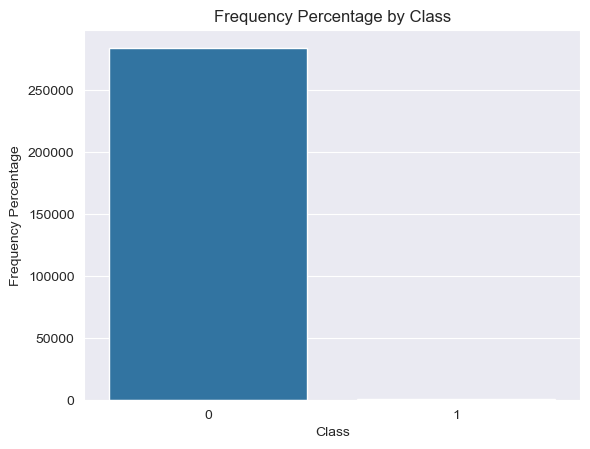

In [14]:
# データの可視化
count_classes = pd.value_counts(data['Class']).sort_index()
ax: plt.Axes = sns.barplot(x=count_classes.index, y=count_classes)
ax.set_title('Frequency Percentage by Class')
ax.set_xlabel('Class')
ax.set_ylabel('Frequency Percentage')

In [35]:
normalize_data_columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [23]:
# ハイパーパラメータの設定
params  = {
    'penalty': 'l2', # 正則化項：L1 or L2．
    'dual': False, #　最適化手法の選択　`dual form` or `primal form` 通常，サンプルの数が特徴量の数より多い場合はdualを用いる．
    'C': 1.0, # 逆正則化パラメータ： 正則化の強度を指定する，Cの値が小さいほど，正則化が強化され，モデルの複雑性が増加する．
    'fit_intercept': True, # 切片の有無　入力が0の場合の出力を調整する．
    'class_weight': 'balanced', # 自動で重みをつける場合は`balanced`，自分でつける場合は，dictで指定{クラス名: 重み}
    'max_iter': 100,
    'random_state': RANDOM_STATE, # ランダムシード
    'solver': 'liblinear', # 最適化アルゴリズムを指定 `liblinear`は小規模なデータセットやバイナリ分類問題に適する．スケーリングに対して敏感
    'n_jobs': 1, # 並列実行数 -1の場合は可能な限りのコアを使用する．
}
log_reg = LogisticRegression(**params)
penalty = 'l2'
C = 1.0
class_weight = 'balanced'
random_state = 2018
solver = 'liblinear'
n_jobs = 1

log_reg = LogisticRegression(penalty=penalty, C=C,
                            class_weight=class_weight, random_state=random_state,
                            solver=solver, n_jobs=n_jobs)

In [24]:
training_scores = [] #　
validation_scores = [] #
prediction_based_on_kfolds = pd.DataFrame(data=[], index=y_train.index, columns=[0, 1])
prediction_based_on_kfolds

,0,1
142087,NaN,NaN
165168,NaN,NaN
235908,NaN,NaN
148255,NaN,NaN
145672,NaN,NaN
...,...,...
30023,NaN,NaN
195475,NaN,NaN
48687,NaN,NaN
159608,NaN,NaN


In [36]:
#　k-foldは，`StratifiedKFold`　を使用しているため，y_trainのラベル分布が近くなるように分割する．
# x_trainの値の分布を考慮せずに分割して欲しいため，0埋めした配列を`split()`の引数にいれ，そのランダムなインデックスのリストを取得する．
for train_index, validate_index in k_fold.split(np.zeros(len(x_train)), y_train.ravel()):
    x_train_fold, x_validate_fold = x_train.iloc[train_index, :], x_train.iloc[validate_index, :] # 2次元配列
    y_train_fold, y_validate_fold = y_train.iloc[train_index], y_train.iloc[validate_index] # １次元配列
    log_reg.fit(x_train_fold, y_train_fold)
    training_score = log_loss(y_train_fold, log_reg.predict_proba(x_train_fold)[:, 1])
    training_scores.append(training_score)

    prediction_based_on_kfolds.loc[x_validate_fold.index, :] = log_reg.predict_proba(x_validate_fold)
    validation_score = log_loss(y_validate_fold, prediction_based_on_kfolds.loc[x_validate_fold.index, 1])
    validation_scores.append(validation_score)

    print(f"training log loss:  {training_score}")
    print(f"validation log loss: {validation_score}")

log_loss_logistic_regression = log_loss(y_train, prediction_based_on_kfolds.loc[:,1])
print(f"logistic regression log loss: {log_loss_logistic_regression}")


training log loss:  0.1096335066858821
validation log loss: 0.10881321381347492
training log loss:  0.10467114198127055
validation log loss: 0.10406314506584508
training log loss:  0.11567929424155178
validation log loss: 0.11808417772646133
training log loss:  0.11598463406128211
validation log loss: 0.11844743629729089
training log loss:  0.09741833413532017
validation log loss: 0.09735039405346642
logistic regression log loss: 0.1093516733913077
